# Проверка гипотез по увеличению выручки в интернет-магазине — оценка результатов A/B теста

Проект поделен на две части:

1. Приоретизация гипотез
2. Анализ A/B-теста

**Цель первой части** - выявить гипотезы, которые увеличивают выручку.  
**Цель второй части** - определить успешность A/B-теста.

В проект входит выполнение следующих **задач**:
1. Обзор данных
2. Подготовка данных
3. Приоретизация гипотез
4. Анализ A/B-теста
5. Подведение итогов

**Описание данных:**

**hypothesis.csv**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**orders.csv.**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**visitors.csv**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоретизация гипотез

### Обзор данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
from matplotlib import pyplot as plt

In [2]:
# Загрузка данных
hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
# Функция обзора данных
def first_look(df):
    print('----------Первые 5 строк----------')
    display(df.head())
    print('\n')
    print('----------Тип данных----------')
    display(df.info())
    print('----------Пропуски в данных----------')
    df_isna = df.isna().sum()
    if df_isna.sum() > 0:
        print(df_isna)
    else: print('Пропусков нет')
    print()
    print('-----Количество явных дубликатов-----')
    print(df.duplicated().sum())

In [4]:
first_look(hypothesis)

----------Первые 5 строк----------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1




----------Тип данных----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

----------Пропуски в данных----------
Пропусков нет

-----Количество явных дубликатов-----
0


- Библиотеки импорированы;
- Данные загружены;
- Обзор данных проведен.

### Приоретизация

**Задачи:**
- Применить фреймворк ICE для приоритизации гипотез;
- Применить фреймворк RICE для приоритизации гипотез;
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE.

####  Фреймворк ICE

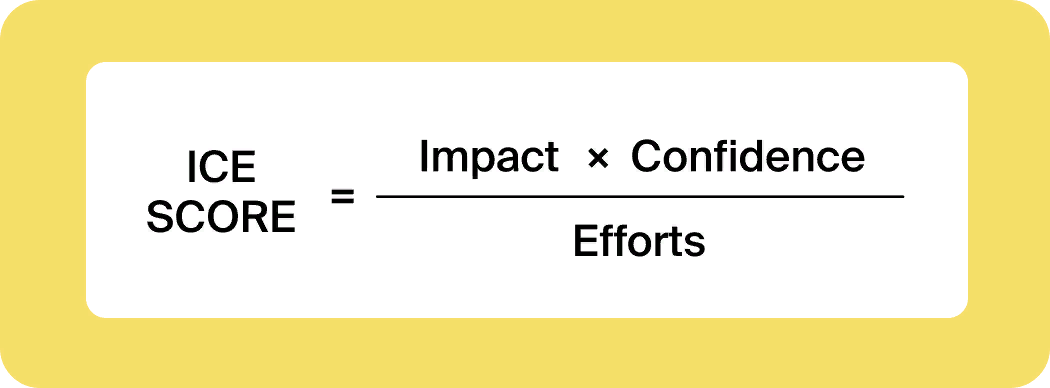

**Impact** — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

**Confidence** — насколько вы уверены, что это изменение повлияет на пользователей именно так;

**Efforts** — сколько стоит протестировать эту гипотезу.

Посчитаем ICE SCORE.

In [5]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).astype('int')
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16
0,"Добавить два новых канала привлечения трафика,...",13
7,Добавить форму подписки на все основные страни...,11
6,Показать на главной странице баннеры с актуаль...,8
2,Добавить блоки рекомендаций товаров на сайт ин...,7
1,"Запустить собственную службу доставки, что сок...",2
3,"Изменить структура категорий, что увеличит кон...",1
4,"Изменить цвет фона главной страницы, чтобы уве...",1
5,"Добавить страницу отзывов клиентов о магазине,...",1


- Выделяется топ гипотез - 0, 2, 6, 7, 8.
- Самая приоритетная гипотеза с индексом №8.

#### Фреймворк RICE

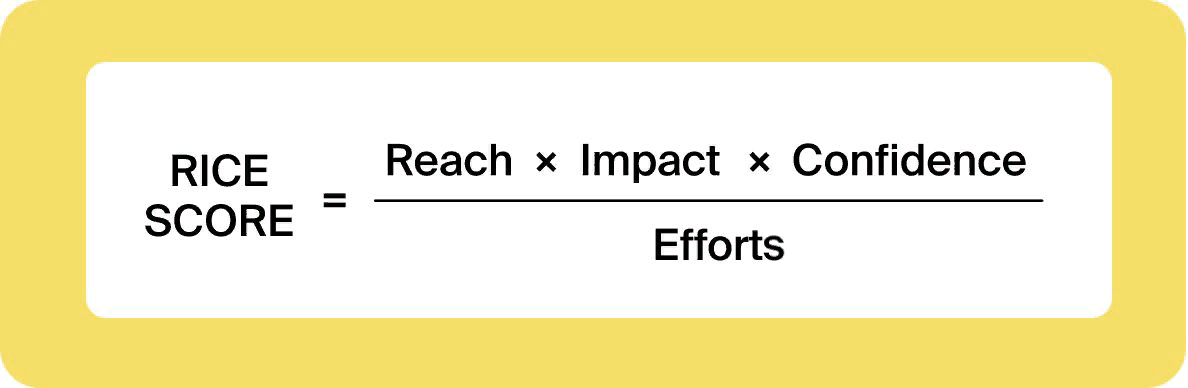

В оценку RICE добавляется ещё одна компонента - **Reach** - обозначает количество пользователей, которых потенциально затронет изменение.

Посчитаем RICE SCORE.

In [6]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).astype('int')
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112
2,Добавить блоки рекомендаций товаров на сайт ин...,56
0,"Добавить два новых канала привлечения трафика,...",40
6,Показать на главной странице баннеры с актуаль...,40
8,"Запустить акцию, дающую скидку на товар в день...",16
3,"Изменить структура категорий, что увеличит кон...",9
1,"Запустить собственную службу доставки, что сок...",4
5,"Добавить страницу отзывов клиентов о магазине,...",4
4,"Изменить цвет фона главной страницы, чтобы уве...",3


- Выделяется топ гипотез - 0, 2, 6, 7.
- Самя приоритетная гипотеза № 7

#### Выводы

In [7]:
hypothesis[['Hypothesis', 'Reach', 'ICE', 'RICE']].sort_values(by=['ICE', 'RICE'], ascending=False)

,Hypothesis,Reach,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,16,16
0,"Добавить два новых канала привлечения трафика,...",3,13,40
7,Добавить форму подписки на все основные страни...,10,11,112
6,Показать на главной странице баннеры с актуаль...,5,8,40
2,Добавить блоки рекомендаций товаров на сайт ин...,8,7,56
1,"Запустить собственную службу доставки, что сок...",2,2,4
3,"Изменить структура категорий, что увеличит кон...",8,1,9
5,"Добавить страницу отзывов клиентов о магазине,...",3,1,4
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,3


- Единственное отличие метода ICE от RICE это параметр **Reach**;
- Благодаря позитивной оценке охвата пользоатель в 10 баллов гипотеза с индексом 7 стала иметь наибольший приоритет;
- Гипотеза № 8 по RICE не проявила себя;
- Можно отметить, что гипотезы с высоким баллом по ICE (> 2) также получили высокий балл и по RICE и остались в приоритетном топе. 

## Анализ A/B теста

### Обзор данных

In [8]:
# Загрузка данных
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [9]:
# Обзор данных
first_look(orders)

----------Первые 5 строк----------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B




----------Тип данных----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

----------Пропуски в данных----------
Пропусков нет

-----Количество явных дубликатов-----
0


In [10]:
first_look(visitors)

----------Первые 5 строк----------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756




----------Тип данных----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

----------Пропуски в данных----------
Пропусков нет

-----Количество явных дубликатов-----
0


Необходимо привести даты формат datetime.

### Приведение форматов

In [11]:
# Приведение формата к datetime
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

###  Кумулятивные графики

**Задачи:**
- График кумулятивной выручки по группам;
- График кумулятивного среднего чека по группам;
- График относительного изменения кумулятивного среднего чека;
- График кумулятивной конверсии по группам;
- График относительного изменения кумулятивной конверсии группы B к группе A.

#### Подготовка к построению графиков

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим для этого датафрейм `cumulative_data`.

In [12]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные кумулятивные по дням данные о заказах.

In [13]:
# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = (dates_groups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
)
orders_aggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Аналогично получим агрегированные кумулятивные по дням данные о посетителях.

In [14]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = (dates_groups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
)

Объединим обе таблицы в одну с понятными названиями столбцов.

In [15]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Данные для построения кумулятивных графиков по группам подготовлены.

####  График кумулятивной выручки по группам

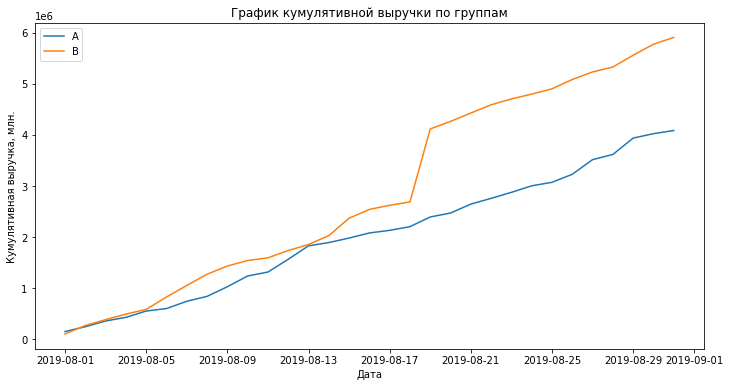

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 6))

# Строим график выручки группы А
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

#оформляем
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка, млн.')
plt.legend(); 

**Выводы:**
- Выручки групп равномерно увеличиваются до 05 августа;
- После пятого дня динамика выручки группы B несколько увличилась в сравнении с группой A и в целом в дальнейшем опережала прирост выручки группы A;
- График выручки группы B резко растет 18 августа, что может сигнализировать о всплесках числа заказов или о появлении очень дорогих заказов в выборке.

#### График кумулятивного среднего чека по группам 

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

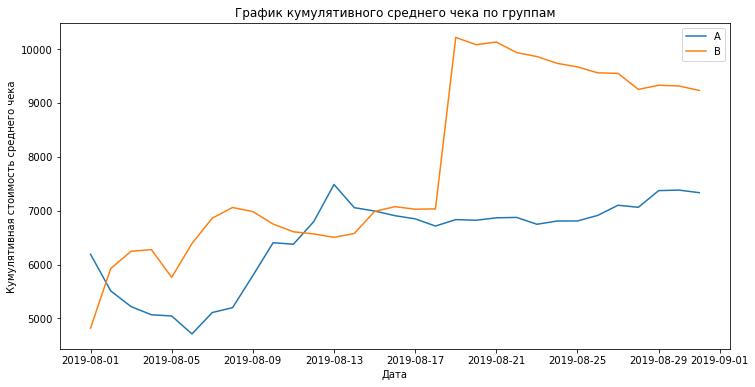

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная стоимость среднего чека')
plt.legend(); 

**Выводы**
- Средний чек для группы A установился примерно после 13 августа.
- Наблюдается скачок среднего чека в группе B 18 августа - видимо в этот день попали крупные заказы.

#### График относительного изменения кумулятивного среднего чека 

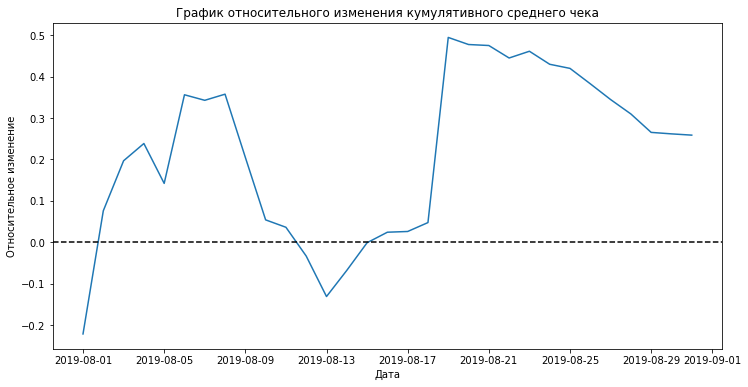

In [18]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6))

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--'); 

# оформляем
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение');

**Выводы**
- График имеет достаточно большой диапазон колебаний;
- 18 августа наблюдается большой резкий скачёк.

#### График кумулятивной конверсии по группам

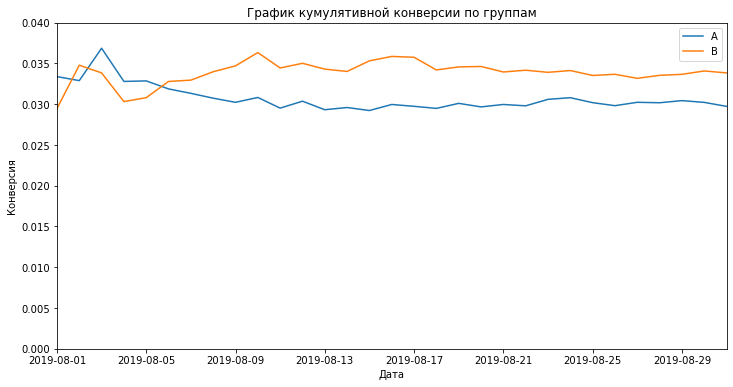

In [19]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')

# оформляем
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()

# задаем масштаб осей
plt.axis([min(cumulative_data_A['date']), max(cumulative_data_A['date']), 0, 0.04]); 

**Выводы**
- С 1-ого по 9 числа вагуста конверсия достаточно сильно колебалась;
- Далее конверсия стабилизировалась и конверсия группы B стала стабильно выше конверсии группы A.

#### График относительного изменения кумулятивной конверсии группы B к группе A 

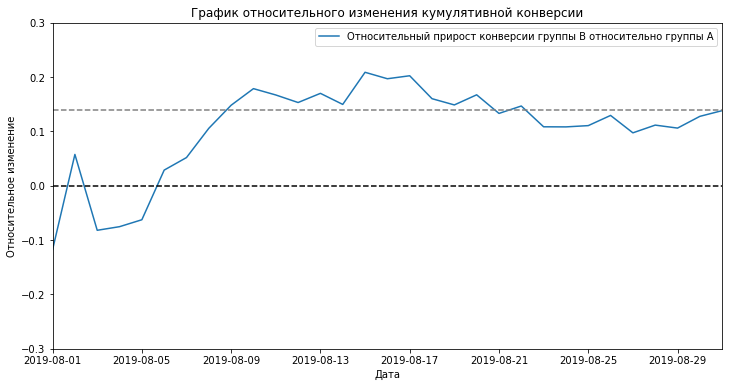

In [20]:
# собираем данные в одном датафрейме
merged_cumulative_conversions = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение конверсий
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

# добавляем оси X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis([min(cumulative_data_A['date']), max(cumulative_data_A['date']), -0.3, 0.3]);

# оформляем
plt.title('График относительного изменения кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение');

**Выводы:**
- Относительный прирост конверсии группы B стабильно выше прироста конверсии группы A начиная с 9-ого августа;
- Однако окончательные выводы делать рано - необходимо проанализировать аномалии.

### Анализ выбросов 

**Задачи:**
- Точечный график количества заказов по пользователям;
- Определение 95-ого и 99-ого перцентиля количества заказов на пользователя;
- Точечный график стоимостей заказов;
- Определение 95-ого и 99-ого перцентиля стоимости заказов.

#### Точечный график количества заказов по пользователям

In [21]:
# подсчет количества заказов по пользователям
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users.columns = ['user_id', 'orders_count']

orders_by_users.sort_values(by='orders_count', ascending=False).head(10)

,user_id,orders_count
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Скорее всего более пяти заказов за рассматриваемы период от одного клиента это аномально много.

Рассмотрим гистограмму распределения количества заказов на одного пользователя.

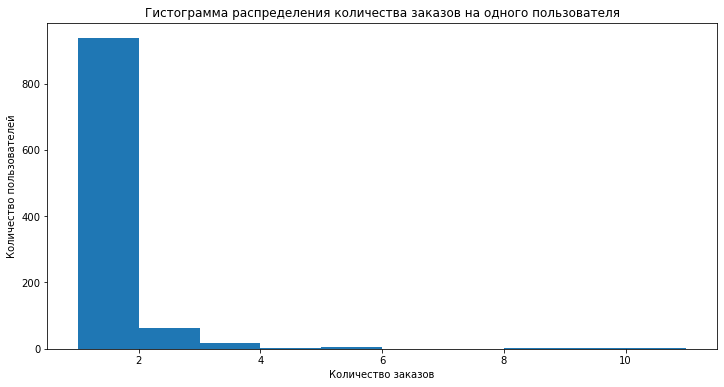

In [22]:
# размер
plt.figure(figsize=(12, 6))

# построение графика
plt.hist(orders_by_users['orders_count'])

# оформление
plt.title('Гистограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей');

Большинство покупателей сделали заказ только один раз. Доля пользователй, сделавших заказ 2 раза также значительна.

Построим точечную диаграмму числа заказов на одного пользователя.

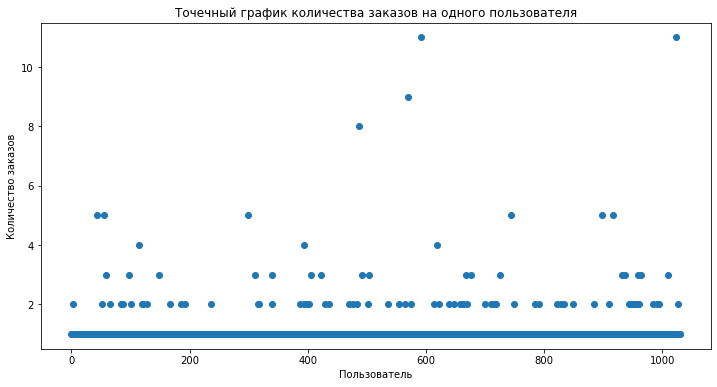

In [23]:
# размер
plt.figure(figsize=(12, 6))

# построение графика
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders_count']);

# офрмление
plt.title('Точечный график количества заказов на одного пользователя')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов');

Согласно точечному графику значительная часть покупателей сделала от одного до трёх заказов включительно. Однако более точный порог для изъятия аномалий лучше определить с помощью подсчета перцентилей.

#### Определение 95-ого и 99-ого перцентиля количества заказов на пользователя

In [24]:
np.percentile(orders_by_users['orders_count'], [95, 99])

array([2., 4.])

**Выводы**
- Не более 5% пользователй оформляли заказ больше чем 2 раза;
- И не более 1% пользователей заказывали больше 4-х раз;
- Таким образом, пользователей с заказми более 2-х раз лучше изъять из анализа.

#### Точечный график стоимостей заказов

Рассмотрим гистограмму распределения стоимости заказов.

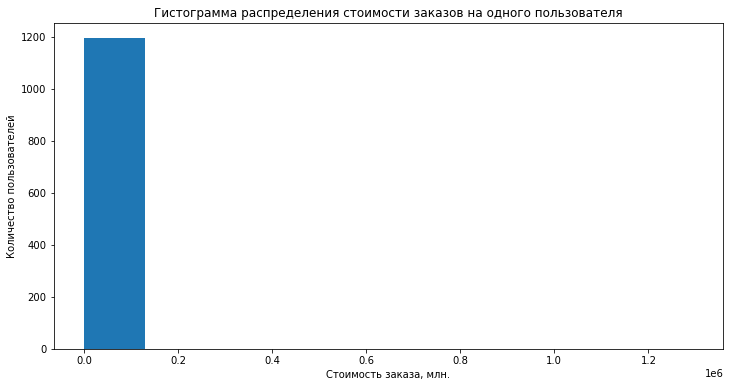

In [25]:
# размер
plt.figure(figsize=(12, 6))

# построение графика
plt.hist(orders['revenue'])

# офрмление
plt.title('Гистограмма распределения стоимости заказов на одного пользователя')
plt.xlabel('Стоимость заказа, млн.')
plt.ylabel('Количество пользователей');

Стоимость заказаов у большинства покупателей составила менее 100 тыс.

Посмотрим точечный график стоимости заказов.

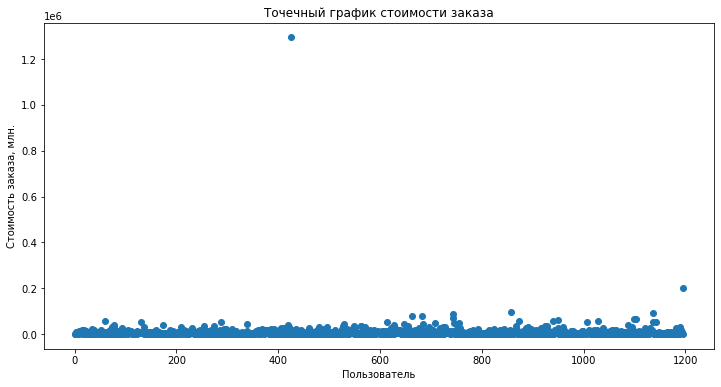

In [26]:
# размер
plt.figure(figsize=(12, 6))

# построение графика
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

# офрмление
plt.title('Точечный график стоимости заказа')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказа, млн.');

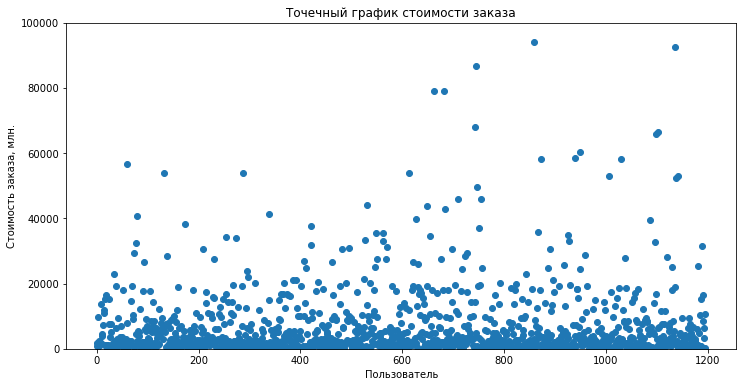

In [27]:
# размер
plt.figure(figsize=(12, 6))

# построение графика с ограничением по оси y
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)

# офрмление
plt.title('Точечный график стоимости заказа')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказа, млн.');

**Выводы**
- Обнаружено два выдающихся занчения, одно со значением более 1.2 млн., а другое чуть больше 200 тыс.
- Большинство же заказов имеют стоимость менее 100 тыс., однако для более точного определения аномальных значений лучше воспользоваться подсчетом перцентилей.

#### Определение 95-ого и 99-ого перцентиля стоимости заказов 

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Выводы**
- Не более 5% заказов дороже 28 000 и не более 1% дороже 58 233.
- Таким образом заказы дороже 28 000 лучше изъять из анализа.

###  Подсчет статистических значимостей

**Задачи:**
- Подсчет статистической значимости различий в конверсии между группами по «сырым» данным. 
- Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.
- Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным.
- Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

#### Определение уникальности пользователей в группах 

Для выполнения этой задачи найдём уникальных пользователей в каждой из групп. После этого посмотрим не попали ли некоторые пользователи одновременно в оба списка. Запишем таких в отдельный список, если нашлись. Далее удалим заказы тех пользователей из таблицы `orders`, которые нашлись, и в группе A, и в группе B.  

In [29]:
# списки уникальных пользователей по группам
visitors_A = orders[orders['group'] == 'A']['visitorId'].unique()
visitors_B = orders[orders['group'] == 'B']['visitorId'].unique()

# задаём список
not_unique_visitors = []

# сосздаем цикл, отбирающий совпадающих пользователей
for visitor_A in visitors_A:
    for visitor_B in visitors_B:
        if visitor_A == visitor_B and visitor_A not in not_unique_visitors:
            not_unique_visitors.append(visitor_A)
        else:
            pass

# количество заказов до изъятия одинаковых пользователей
orders_count_before = len(orders)

# заказы после изъятия одинаковых пользователей
orders = orders[~orders['visitorId'].isin(not_unique_visitors)]

# количество заказов после изъятия одинаковых пользователей
orders_count_after = len(orders)

# доля изъятых заказов
deleted_part = '{:.2%}'.format(1 - orders_count_after/orders_count_before)
deleted_part

'15.12%'

Доля изъятых заказов составила 15.12%.

#### Подсчет статистической значимости различий в конверсии между группами по «сырым» данным

Создадим переменные `orders_by_users_A` и `orders_by_users_B` со столбцами 'userId', 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [30]:
# число заказов группы A
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
    
orders_by_users_A.columns = ['userId', 'orders']

# число заказов группы B
orders_by_users_B = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users_B.columns = ['userId', 'orders']

Объявим переменные `sample_A` и `sample_B`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Также необходимо добавить строки с нулями в переменные `sample_A` и `sample_B` - нули это пользователи, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах.

In [31]:
sample_A = pd.concat([orders_by_users_A['orders'], pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_A['orders'])), name='orders')], axis=0)

sample_B = pd.concat([orders_by_users_B['orders'], pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_B['orders'])), name='orders')], axis=0)

Отметим что конверсия в данном случае это сумма заказов деленное на число пользователей.

**Сформулируем гипотезы.** 
Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

Применим критерий Манна-Уитни к полученным выборкам.

In [32]:
alpha = .05

p_value = stats.mannwhitneyu(sample_A, sample_B)[1]

if p_value > alpha:
    print('p_value:', "{0:.3f}".format(p_value),
          '\nПринимаем нулевую гипотезу: статистически значимых различий\nв конверсии между группами нет.')
else: print('p_value:', "{0:.3f}".format(p_value),
            '\nОтвергаем нулевую гипотезу: статистически значимые различия\nв конверсии между группами есть.')

p_value: 0.885 
Принимаем нулевую гипотезу: статистически значимых различий
в конверсии между группами нет.


Взглянем на относительный прирост конверсии группы B.

In [33]:
'{0:.1%}'.format(sample_B.mean() / sample_A.mean() - 1)

'-1.0%'

Относительный прирост конверсии группы B отрицатетельный и составляет всего 1%.

**Вывод.** Различий в конверсиях между группами A и B не обнаружено. Это подтверждается тестом Манна-Уитни, а также незначительным изменением относительного прироста конверсии.

#### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. 

**Сформулируем гипотезы.** 
Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [34]:
# данные о выручке с заказов
sample_A = orders[orders['group'] == 'A']['revenue']
sample_B = orders[orders['group'] == 'B']['revenue']

alpha = .05

p_value = stats.mannwhitneyu(sample_A, sample_B)[1]

if p_value > alpha:
    print('p_value:', "{0:.3f}".format(p_value),
          '\nПринимаем нулевую гипотезу: статистически значимых различий\nв среднем чеке между группами нет.')
else: print('p_value:', "{0:.3f}".format(p_value),
            '\nОтвергаем нулевую гипотезу: статистически значимые различия\nв среднем чеке между группами есть.')

p_value: 0.829 
Принимаем нулевую гипотезу: статистически значимых различий
в среднем чеке между группами нет.


Также найдем относительный прирост среднего чека:

In [35]:
'{0:.1%}'.format(sample_B.mean() / sample_A.mean() - 1)

'28.7%'

Средний чек значительно выше у группы B - на 29%.

**Выводы.** Согласно критерию Манна-Уитни статистических значимых различий не было обнаружено, однако, прирост среднего чека в группе B составляет 26%. Эти два положения на первый взгляд противоречивые.

Таким образом, следует рассмотреть выборки без аномальных значений.

#### Срезы аномальных пользователей

Исходя из нашего исследования, проведенного ранее, 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей.

Сделаем срезы пользователей с числом заказов больше 2 — `users_with_many_orders` и пользователей, совершивших заказы дороже 28 000 — `users_with_expensive_orders`. Объединим их в таблице `abnormal_users`.

In [36]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > 2]['userId'],
        orders_by_users_B[orders_by_users_B['orders'] > 2]['userId'],
    ],
    axis=0,
)

users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitorId']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormal_users.head(5))

1099    148427295
928     204675465
684     358944393
648     382846391
58      611059232
dtype: int64


Узнаем, сколько всего аномальных пользователей.

In [37]:
abnormal_users.shape[0]

53

Аномальных пользователей - 53.

#### Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным.  

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [38]:
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
            visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам и найдём относительный прирост конверсии:

**Гипотезы** 

*Нулевая гипотеза:* различий в конверсии между группами нет. 

*Альтернативная гипотеза:* различия в конверсии между группами есть.

In [39]:
alpha = .05

p_value = stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]

if p_value > alpha:
    print('p_value:', "{0:.3f}".format(p_value),
          '\nПринимаем нулевую гипотезу: статистически значимых различий\nв конверсии между группами нет.')
else: print('p_value:', "{0:.3f}".format(p_value),
            '\nОтвергаем нулевую гипотезу: статистически значимые различия\nв конверсии между группами есть.')
    
print('Относительный прирост конверсии:', '{0:.1%}'.format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

p_value: 0.889 
Принимаем нулевую гипотезу: статистически значимых различий
в конверсии между группами нет.
Относительный прирост конверсии: -1.0%


Результаты по конверсии в с сравнении с исходной выборкой почти не изменились.

#### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Посчитаем статистическую значимость различий в среднем чеке между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [40]:
sample_A_filtered =  orders[np.logical_and(orders['group'] == 'A',
                     np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue']

sample_B_filtered = orders[np.logical_and(orders['group'] == 'B',
                     np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue']

Применим статистический критерий Манна-Уитни к полученным выборкам и найдём относительный прирост среднего чека по отношению к группе В:

**Гипотезы** 

*Нулевая гипотеза:* различий в среднем чеке между группами нет. 

*Альтернативная гипотеза:* различия в среднем чеке между группами есть.

In [41]:
alpha = .05

p_value = stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]

if p_value > alpha:
    print('p_value:', "{0:.3f}".format(p_value),
          '\nПринимаем нулевую гипотезу: статистически значимых различий\nв среднем чеке между группами нет.')
else: print('p_value:', "{0:.3f}".format(p_value),
            '\nОтвергаем нулевую гипотезу: статистически значимые различия\nв среднем чеке между группами есть.')
    
print('Относительный прирост среденего чека:', '{0:.1%}'.format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

p_value: 0.815 
Принимаем нулевую гипотезу: статистически значимых различий
в среднем чеке между группами нет.
Относительный прирост среденего чека: -1.5%


p-value немного увеличился, но относительный прирост среднего чека перевернулся в отрицательную сторону с 28.7% до -1.5%.

## Результаты и выводы

- Проведен обзор данных. Пропусков и дубликатов в данных не обнаружено.
- Даты приведены в формат datetime.
- В первой части проекта проведена приретизация гипотез по фремворкам ICE и RICE. 
    - Наиболее выдающийся приоритет по фремфорку RICE имеет гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".
    - Выделен топ гипотез по приоритету:
        - 'Запустить акцию, дающую скидку на товар в день рождения';
        - 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей';
        - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок';
        - 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию';
        - 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'.
- По данным кумулятивных графиков можно сделать следующие выводы:
    - Выручки групп равномерно увеличивались до 5-ого августа;
    - Наблюдается резкий скачок выручки и среднего чека группы B 18 августа, что может сигнализировать о всплесках числа заказов или о появлении очень дорогих заказов в выборке;
    - Конверсия группы B в целом стабильно выше конверсии группы A;
    - Относительное изменение кумулятивного среднего чека падает в конце периода;
    - Относительный прирост конверсии группы B стабильно выше прироста конверсии группы A начиная с 9-ого августа.
- Проведен анализ аномалий
    - 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. 
    - 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
    - 28 000 руб. и 2 заказа были приняты порогами для изъятия аномалий.
- Проведен подсчет статистических значимостей
    - Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;
    - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- Рекомендуется построить куммулятивные графики по выборке без аномальных пользователей.

**Таким образом, в связи с тем, что нет статистически значимых различий по конверсии и среднему чеку между группами и значитильных средних относительных приростов значений метрик после удаления аномалий, можно с увереннсотью остановить тест и зафиксировать отсутствие различий между группами.**